# COURSE: Master math by coding in Python
## SECTION: Calculus

#### https://www.udemy.com/course/math-with-python/?couponCode=MXC-DISC4ALL
#### INSTRUCTOR: sincxpress.com

Note about this code: Each video in this section of the course corresponds to a section of code below. Please note that this code roughly matches the code shown in the live recording, but is not exactly the same -- the variable names, order of lines, and parameters may be slightly different. 

In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from IPython.display import display,Math

# VIDEO: Computing limits of a function

In [5]:
x = sym.symbols('x')
fx = x**3

lim_pnt = 1.5
lim = sym.limit(fx, x, lim_pnt)
display(Math('\\lim_{x\\to %g} %s = %g' %(lim_pnt, sym.latex(fx), lim)))

<IPython.core.display.Math object>

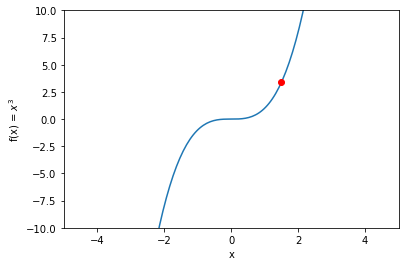

In [11]:
# evaluate the function in a range
fxx = sym.lambdify(x,fx) # a function for evaluating a sympy function
xx = np.linspace(-5,5,200)

# show it in a plot
plt.plot(xx,fxx(xx))

# make the plot look a bit nicer
plt.plot(lim_pnt,lim,'ro')
plt.xlim([-5,5])
plt.ylim([-10,10])
plt.xlabel('x')
plt.ylabel('f(x) = $%s$' %sym.latex(fx))

plt.show()

<IPython.core.display.Math object>

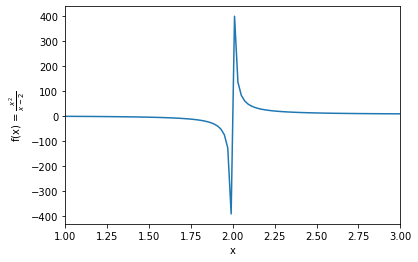

In [12]:
# the function
fx = (x**2)/(x-2)
fxx = sym.lambdify(x,fx) # a function for evaluating a sympy function


xx = np.linspace(1,3,100)

# limit
lim_pnt = 2
lim = sym.limit(fx,x,lim_pnt,dir='+')

display(Math('\\lim_{x\\to %g^+} %s = %g' %(lim_pnt,sym.latex(fx),lim)))

# show it in a plot
plt.plot(xx,fxx(xx))

# make the plot look a bit nicer
plt.plot(lim_pnt,lim,'ro')
plt.xlim([1,3])
plt.xlabel('x')
plt.ylabel('f(x) = $%s$' %sym.latex(fx))

plt.show()

### Exercise

# VIDEO: Piece-wise functions

### Exercise

# VIDEO: Derivatives of polynomials

### Exercise

# VIDEO: Derivatives of trig functions

### Exercise

# VIDEO: Graphing a function tangent line

### Exercise

# VIDEO: Finding critical points of a function

### Exercise

# VIDEO: Partial derivatives

### Exercise

# VIDEO: Indefinite and definite integrals

### Exercise

# VIDEO: Area between two curves

### Exercise

### Computing the area between two functions
The area between two functions is given by the formula $A = \int_{a}^{b}f(x) - g(x) dx$

In our example, $f(x)=x^2$ and $g(x)=x$

Therefore, $A = \int_{a}^{b}(x^2 - x) dx$

We will compute the area between the two crossing points, that is, where the two functions are equal. This is given by the two solutions to the equation
$$x^2=x$$

The two solutions are $x=0$ and $x=1$. This gives us the definite integral of
$$A = \int_{0}^{1}(x^2 - x) dx$$

The final answer will be given in the code below.

# VIDEO: Calculus BUG HUNT!!